### Time Series Basics - Lab 01

In [11]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime

In [12]:
# Question No. 1
# What is the day for the date, september 11, 1952?
# Use .strftime('%A') to identify the day(e.g. Monday, Thursday)

my_year = 1952
my_month = 9
my_day = 11

my_date = datetime(my_year,my_month,my_day)
my_date.strftime('%A')

'Thursday'

In [13]:
# Question No. 2
# Using pd.date_create dates starting from october 15, 2008 with 85 periods with day frequency
# What is the date second to the last?

pd.date_range(start='10/15/2008', periods=85, freq='D')[-2]

Timestamp('2009-01-06 00:00:00')

In [14]:
# Load datsets starbucks
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/starbucks.csv', index_col="Date", parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [16]:
# Question No. 3
# Use starbucks.csv datasets
# if you resample the 'close' column to weekly mean frequency, what is the value 2016-05-01?

target_date = datetime(2016, 5, 1)
resampled_df = df.resample(rule='W').mean()
value_2016_05_01 = resampled_df.loc[target_date]
value_2016_05_01

,2016-05-01
Close,5.407050e+01
Volume,1.019756e+07


In [19]:
# Question No. 4
# Use starbucks.csv datasets
# if you resample the 'close' column to quarter end median frequency, what is the value 2017-12-31?

resampled_df = df.resample(rule='Q').median()
resampled_df

<ipython-input-19-482763cc6077>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_df = df.resample(rule='Q').median()


,Close,Volume
Date,,
2015-03-31,43.00900,8120660.0
2015-06-30,47.77640,6637183.0
2015-09-30,53.03445,8057131.5
2015-12-31,57.61635,8033243.5
2016-03-31,55.35280,9529094.0
2016-06-30,53.37830,7929953.5
2016-09-30,53.55495,8484094.0
2016-12-31,52.38070,8004000.0
2017-03-31,54.70350,8488294.5


In [22]:
# Question No. 5
# Use starbucks.csv datasets
# If you resample the volume column to semi-month end mean frequency, what is the median value of the last 5 dates?
smf = df.resample(rule='6MS').mean().tail()
smf.median()['Volume']

9607653.61904762

<ipython-input-23-177d8cf967c2>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='red');


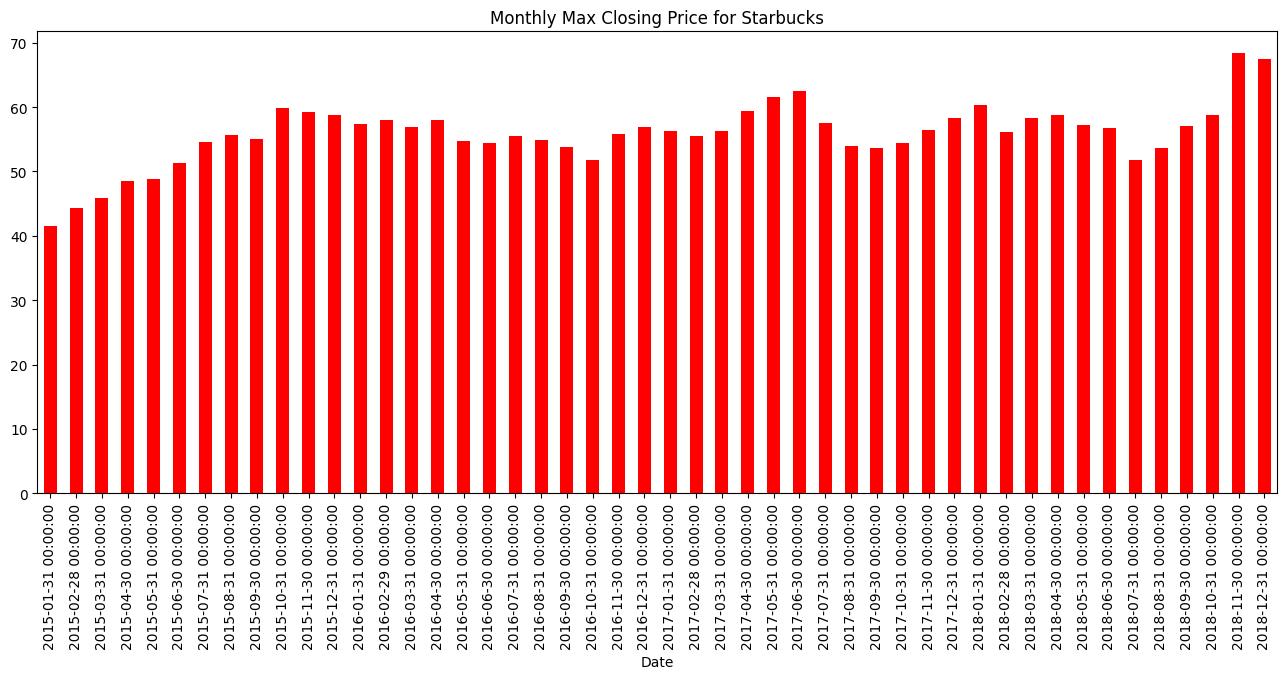

In [23]:
# Question No. 6
# Use starbucks.csv datasets
# Create a bar graph (vertical), show the maximum 'Close' price per month
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color ='red');

In [24]:
# Question No. 7
# If I shift forward the starbucks data value of 17, what is the new value of 'Close' price for 2015-02-26?
df.shift(periods=17).loc['2015-02-26']

,2015-02-26
Close,4.106290e+01
Volume,1.363883e+07


In [25]:
# Question No. 8
# If I shift backwards the starbucks data value of 28, what is the new value of 'Close' price for 2018-08-31?
df.shift(periods=-28).loc['2018-08-31']

,2018-08-31
Close,5.456700e+01
Volume,1.531685e+07


In [30]:
# Question No. 9
# Using average (rolling) with 14 days window, find the closing prince at 2015-04-09?
df.rolling(window=14).mean()
target_date = datetime(2015, 4, 9)
value = df.loc[target_date]
value

,2015-04-09
Close,44.927
Volume,7109621.000


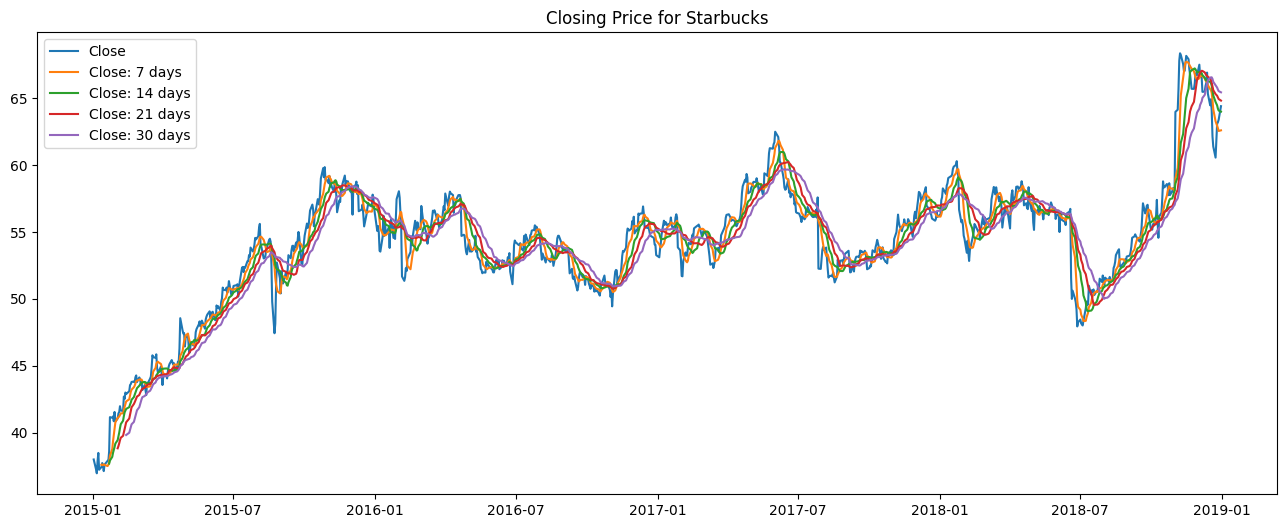

In [31]:
# Question No. 10
# create the graph below with different rolling windows of 7, 14, 21, 30
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(df['Close'], label='Close')
for days in [7, 14, 21, 30]:
    plt.plot(df['Close'].rolling(days).mean(), label=f'Close: {days} days')
plt.legend()
plt.title('Closing Price for Starbucks')
plt.show()

In [ ]:
# Question No. 11
# Base on the graph above, what is your take on increasing and decreasing the number of windows for rolling or moving average?